<h1>Import frameworks</h1>

In [1]:
from matplotlib import pyplot
import tarfile
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


<h1>Read emails</h1>

In [2]:
def decode_bytes(bytes, encodings=('utf-8', 'ascii', 'ISO-8859-1')):
    for encoding in encodings:
        try:
            decoded_text = bytes.decode(encoding)
            return decoded_text
        except UnicodeDecodeError:
            continue
    return None

def parse_tar_bz2(file_path):
    emails = []
    try:
        with tarfile.open(file_path, 'r:bz2') as tar:
            for member in tar.getmembers():
                #print("File:", member.name)
                file = tar.extractfile(member)
                if file is not None:
                    content = file.read()
                    emails.append(decode_bytes(content))
    except tarfile.TarError as e:
        print("Error occurred while processing the tar.bz2 file:", e)
    return emails


<h1>Make confusion matrix</h1>

In [3]:
def make_confusion_matrix(y_test, y_pred, title, classifier):
    conf_matrix = confusion_matrix(y_test, y_pred)
    fig, ax = pyplot.subplots(figsize=(8, 6), layout='constrained')
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', 
                xticklabels=['Spam', title], 
                yticklabels=['Spam', title])
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.set_title('Confusion Matrix ' + title + ' ' + classifier) 



<h1>Classify email</h1>

In [5]:
def classify_email(emails, labels, title):
   
    vectorizer = CountVectorizer()

    # Fit CountVectorizer object to email data and
    # Transform email data into a matrix of token counts
    email_matrix = vectorizer.fit_transform(emails)
    # Split data into training and test sets, with 20% of data reserved for testing
    X_train, X_test, y_train, y_test = train_test_split(email_matrix, labels, test_size=0.2)

    # Train classifier (Multinomial Naive Bayes and Bernoulli Naive Bayes)
    classifierMNB = MultinomialNB()
    classifierBNB = BernoulliNB()
    classifierMNB.fit(X_train, y_train)
    classifierBNB.fit(X_train, y_train)

    # Evaluate the classifier
    y_predMNB = classifierMNB.predict(X_test)
    y_predBNB = classifierBNB.predict(X_test)
    accuracyMNB = accuracy_score(y_test, y_predMNB)
    accuracyBNB = accuracy_score(y_test, y_predBNB)

    print(title + "Multinomial Naive Bayes accuracy:", accuracyMNB)
    print(title + "Bernoulli Naive Bayes Accuracy:", accuracyBNB)

    make_confusion_matrix(y_test, y_predMNB, title, "Multinomial")
    make_confusion_matrix(y_test, y_predBNB, title, "Bernoulli")


<h1>Load emails and classify</h1>

Easy and SpamMultinomial Naive Bayes accuracy: 0.9738134206219312
Easy and SpamBernoulli Naive Bayes Accuracy: 0.9181669394435352
Hard and SpamMultinomial Naive Bayes accuracy: 0.9470198675496688
Hard and SpamBernoulli Naive Bayes Accuracy: 0.8741721854304636


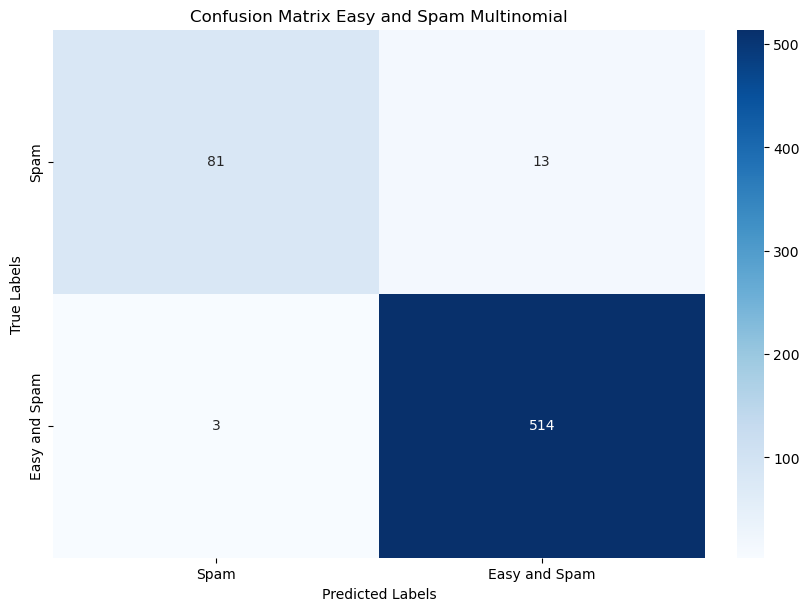

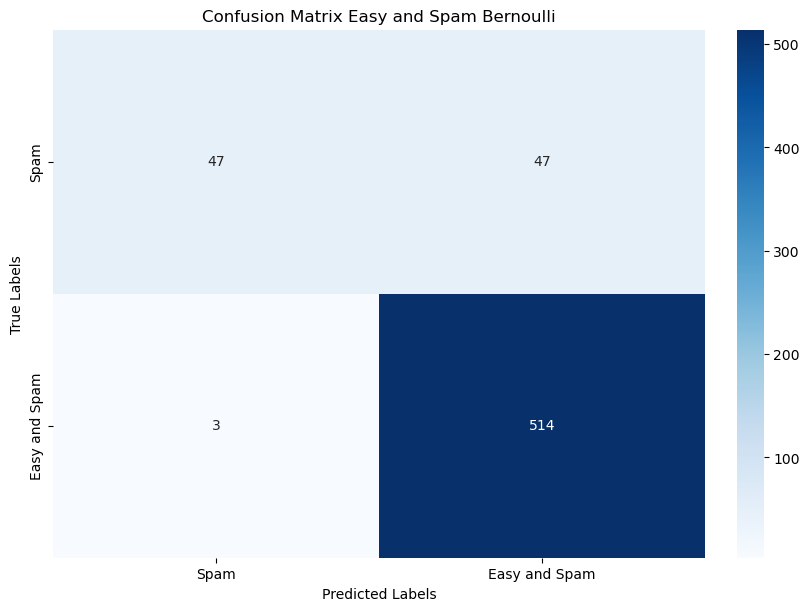

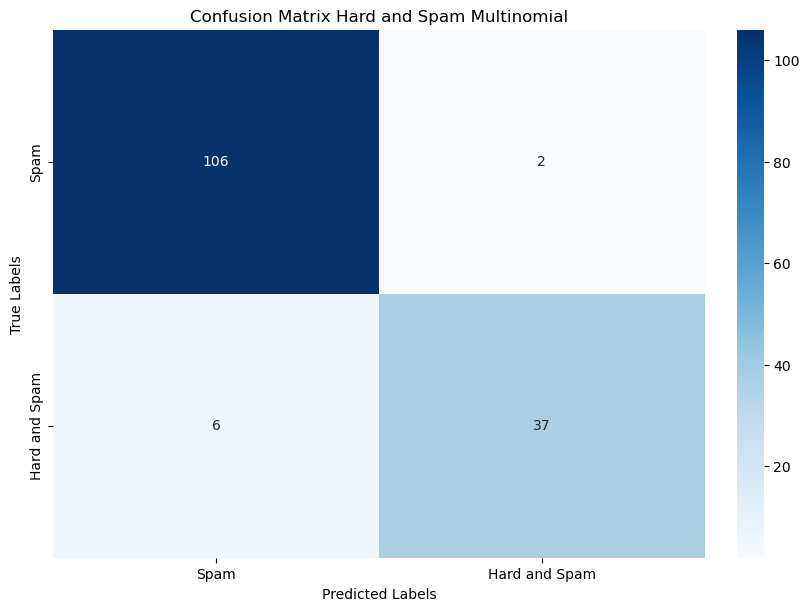

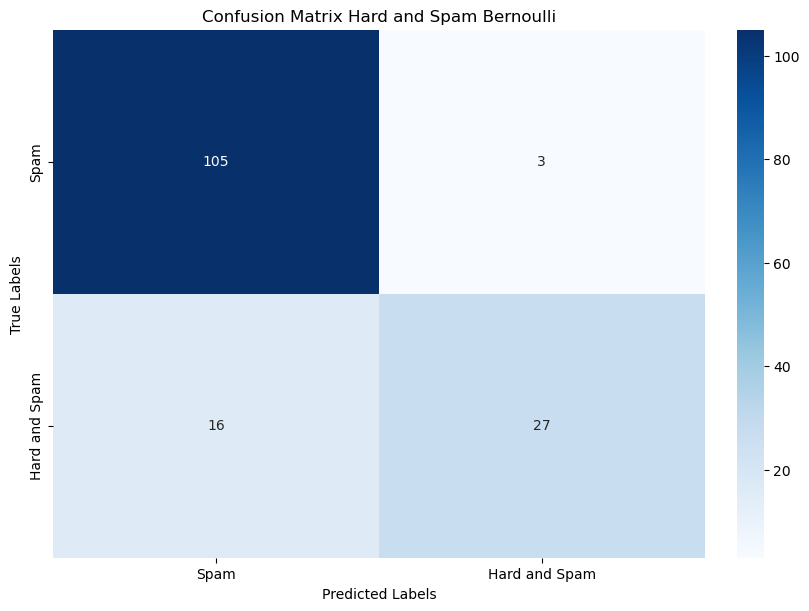

In [6]:
file_path_easy_ham = "../20021010_easy_ham.tar.bz2"  
emails_easy_ham = parse_tar_bz2(file_path_easy_ham)
file_path_hard_ham = "../20021010_hard_ham.tar.bz2"  
emails_hard_ham = parse_tar_bz2(file_path_hard_ham)
file_path_spam = "../20021010_spam.tar.bz2"  
emails_spam = parse_tar_bz2(file_path_spam)

labels_easy_and_spam = [1] * len(emails_easy_ham) + [0] * len(emails_spam)
emails_easy_and_spam = emails_easy_ham + emails_spam

labels_hard_and_spam = [1] * len(emails_hard_ham) + [0] * len(emails_spam)
emails_hard_and_spam = emails_hard_ham + emails_spam

classify_email(emails_easy_and_spam, labels_easy_and_spam, "Easy and Spam")
classify_email(emails_hard_and_spam, labels_hard_and_spam, "Hard and Spam")